In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.1 MB/s eta 0:00:00


In [ ]:
# @title Test if your dataset works!
from datasets import load_dataset

dataset = load_dataset("Euniceyeee/kidney-ct-abnormality")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for Euniceyeee/kidney-ct-abnormality contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Euniceyeee/kidney-ct-abnormality
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['images', 'img_path', 'label'],
        num_rows: 788
    })
    test: Dataset({
        features: ['images', 'img_path', 'label'],
        num_rows: 198
    })
})

###Example:<br>
images: a sequence of CT images as the original CT images have multilayers(already converted to PIL compatible format). <br>
img_path: the original .mha image file path (if visualized, it has higher resolution) (the numpy image array dtype is float64) <br>
label: either 0 or 1, indicating abnormality (0: normal, 1: abnormal)

In [ ]:
next(iter((dataset['train'])))

{'images': [<PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=300x108>,
  <PIL.PngImagePlugin.PngImageFile image mode

In [ ]:
import matplotlib.pyplot as plt
import math

Images:

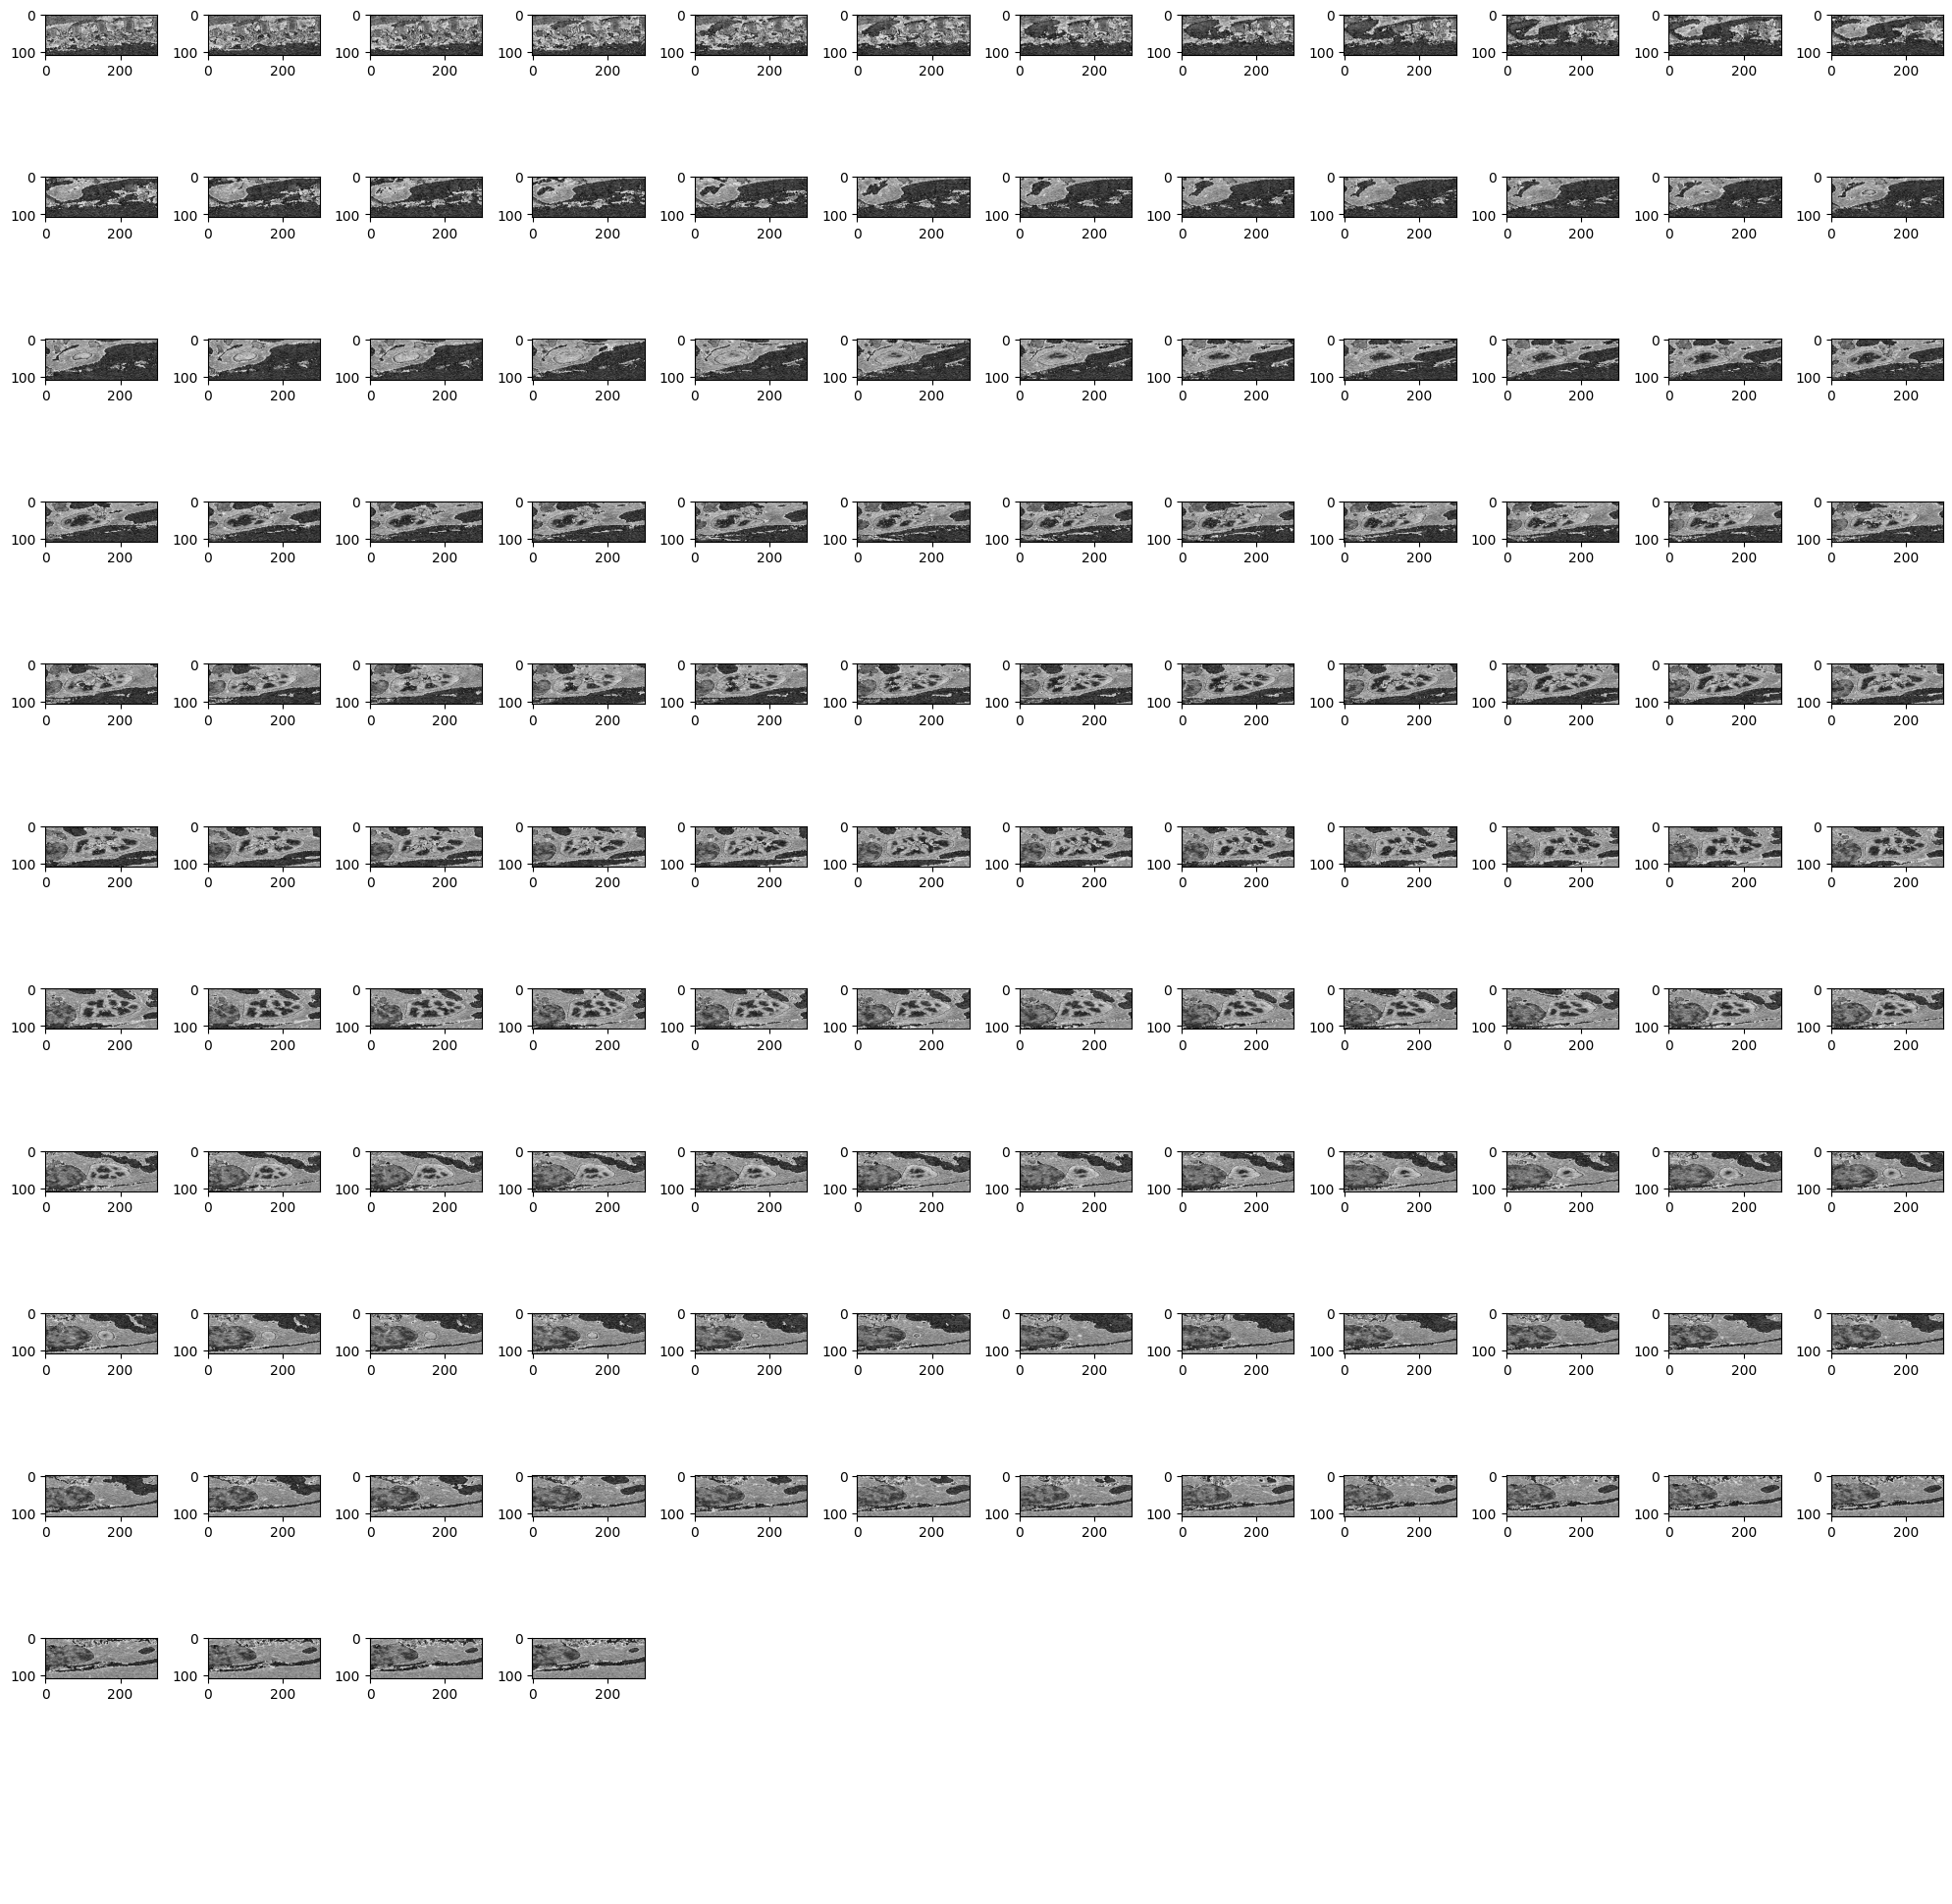

In [ ]:
images = next(iter((dataset['train'])))['images']
num_images = len(images)
grid_size = math.ceil(math.sqrt(num_images))
fig, axs = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(20, 20))
axs = axs.flatten()
for i, img in enumerate(images):
  axs[i].imshow(img, cmap='gray')
  # axs[i].axis('off')
for j in range(i + 1, grid_size**2):
  axs[j].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import SimpleITK as sitk
example_path = next(iter((dataset['train'])))['img_path']

In [ ]:
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214949 sha256=dc118a5f37d2210eac0988761b7b9a732757f4744879187b9235de4b36686880
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


Original image (.mha file):

In [ ]:
from medpy.io import load
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons

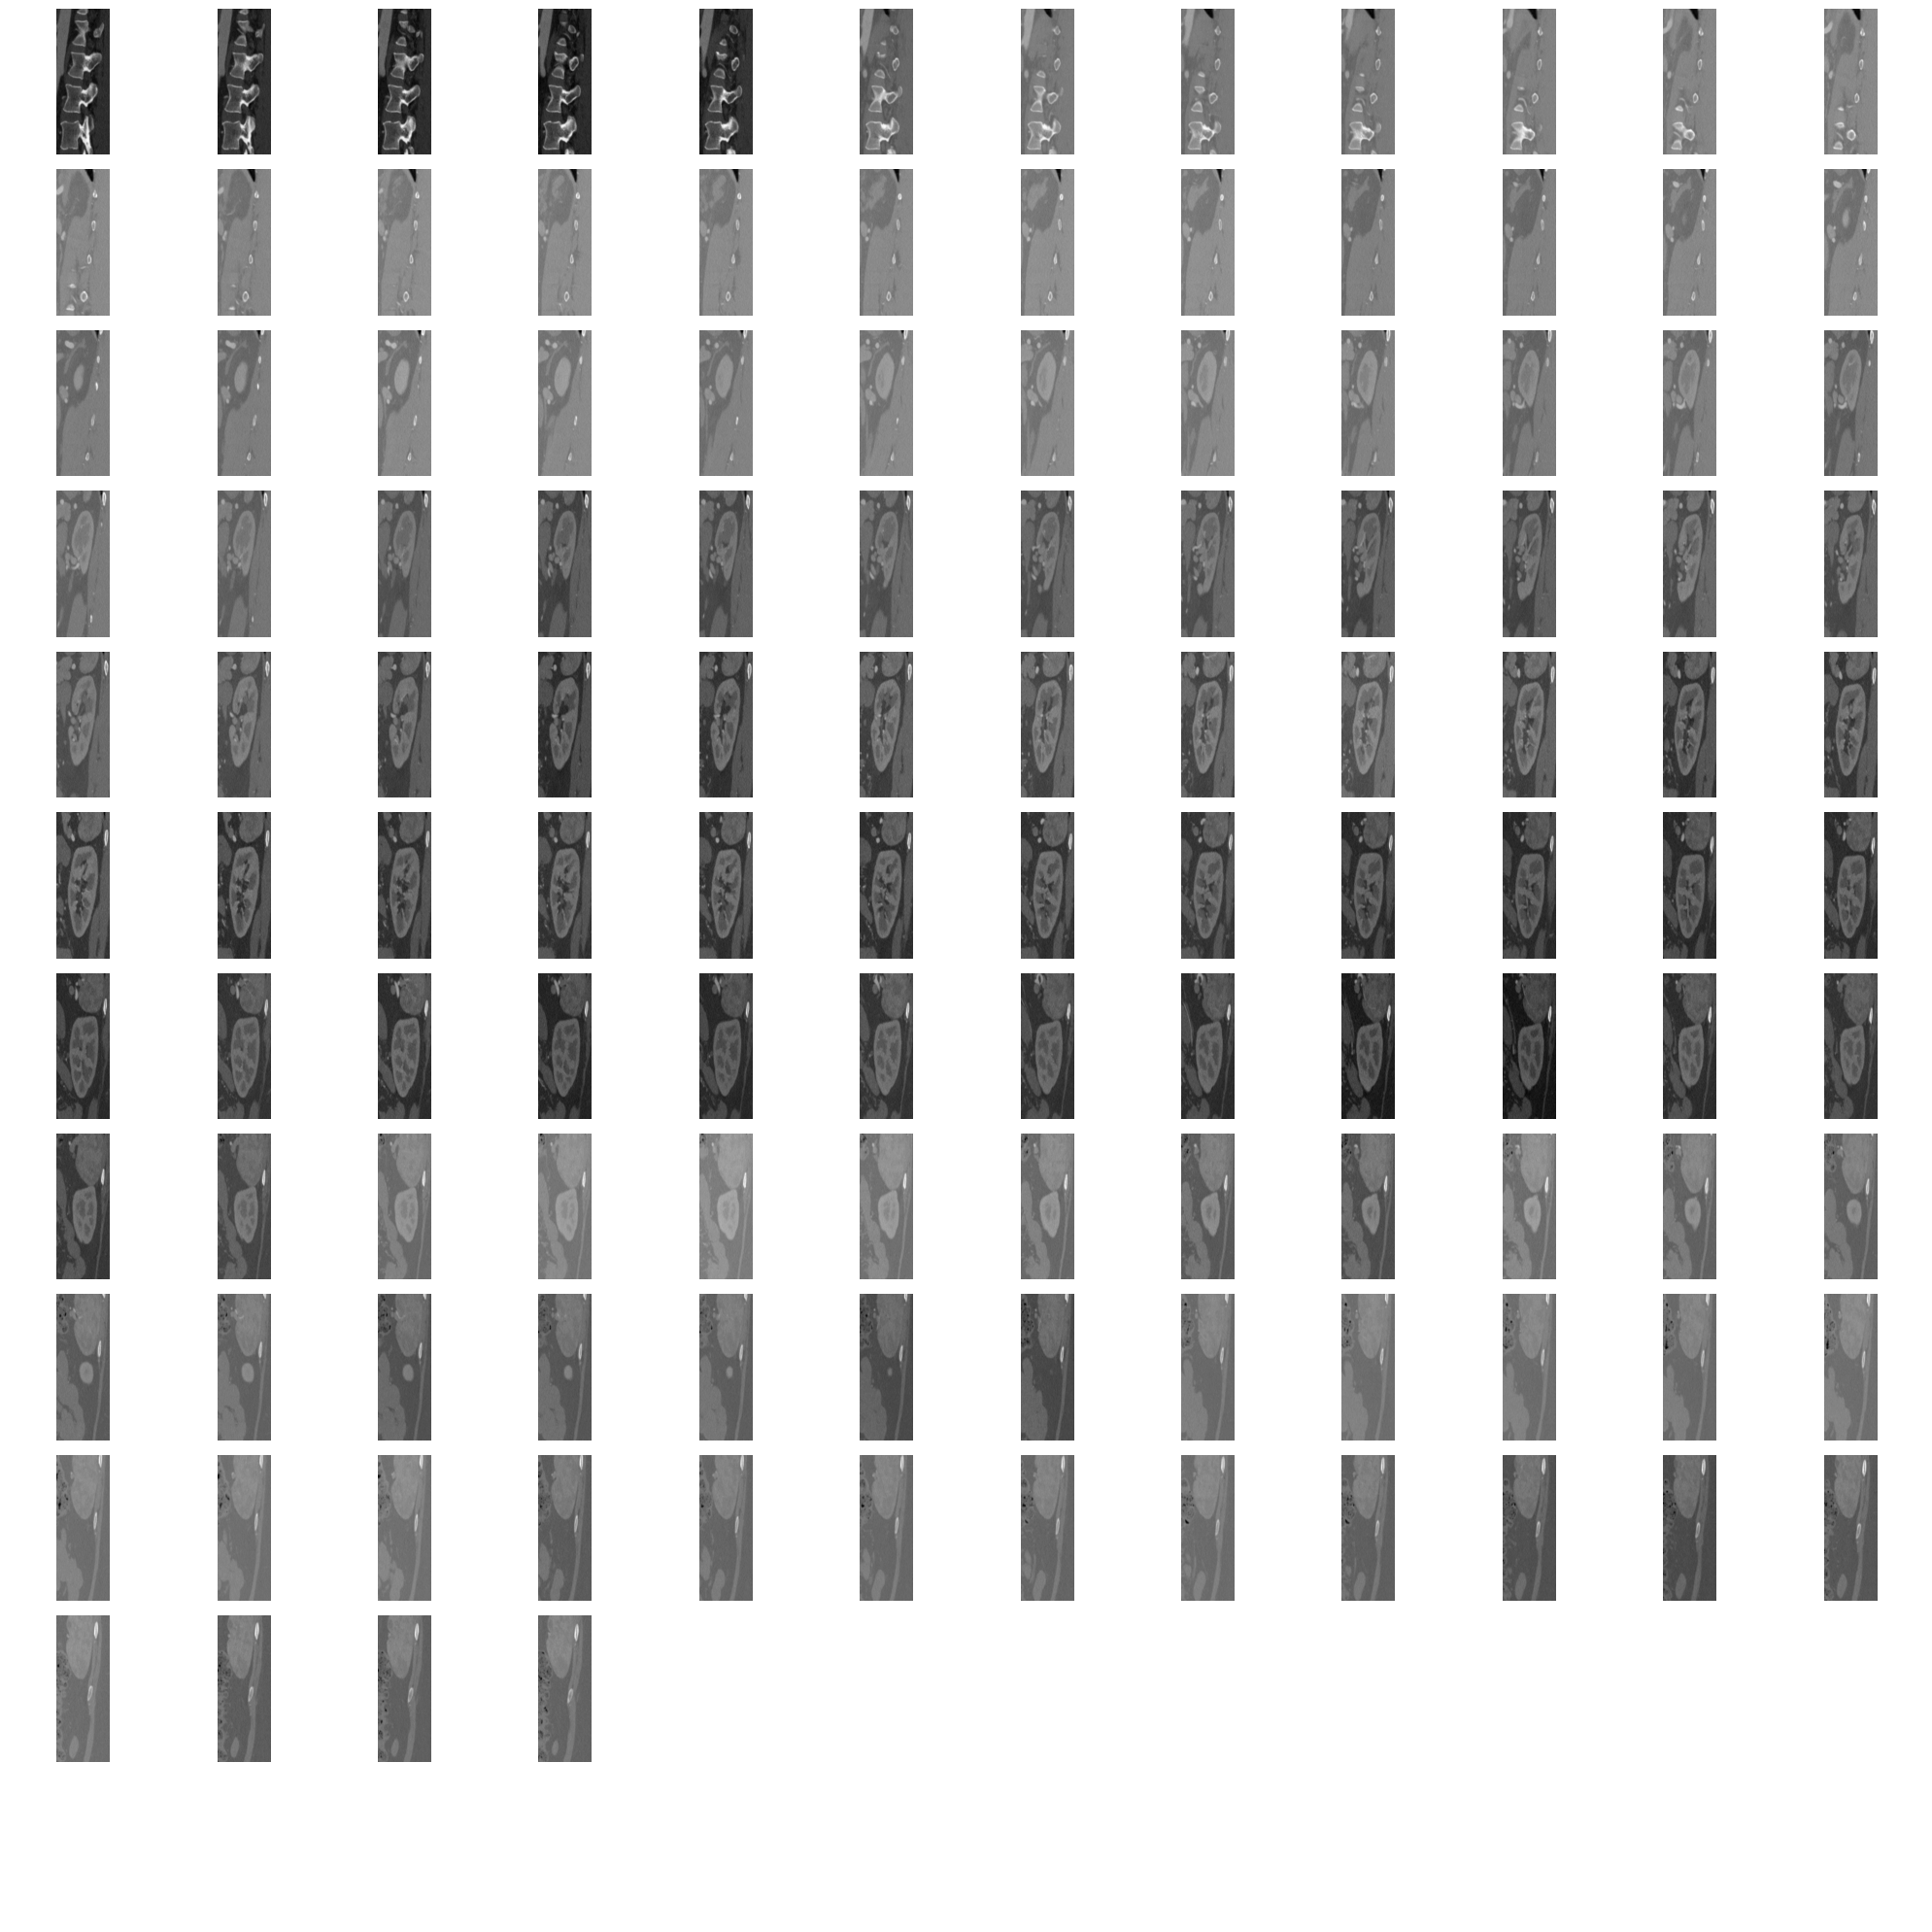

In [ ]:
image_data, image_header = load(example_path)

num_layers = image_data.shape[2]
grid_size = math.ceil(math.sqrt(num_layers))
fig, axs = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(20, 20))
axs = axs.flatten()

for i in range(num_layers):
    axs[i].imshow(image_data[:, :, i], cmap='gray')
    axs[i].axis('off')  # Hide the axes
for j in range(num_layers, len(axs)):
    axs[j].axis('off')
plt.tight_layout()
plt.show()